# Meta-analysis

In [1]:
R.version.string

[1] "R version 4.3.1 (2023-06-16 ucrt)"

In [2]:
#*
system.file(package = 'tidyverse')
system.file(package = 'meta')
system.file(package = 'metafor')
system.file(package = 'IRkernel') #https://www.practicaldatascience.org/html/jupyter_r_notebooks.html
system.file(package = 'dmetar')
system.file(package = 'netmeta')
system.file(package = 'rgl')

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/tidyverse"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/meta"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/metafor"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/IRkernel"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/dmetar"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/netmeta"

[1] "C:/Users/lucas/AppData/Local/R/win-library/4.3/rgl"

### Only if necessary intall some package

In [23]:
#* If necessary
install.packages("tidyverse")

Installing package into 'C:/Users/lucas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lucas\AppData\Local\Temp\Rtmpc1B5xB\downloaded_packages


## Import Libraries

In [3]:
#* Import packages
library(dmetar)
library(netmeta)
library(rgl)

Extensive documentation for the dmetar package can be found at: 
 www.bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/

Carregando pacotes exigidos: meta

Loading 'meta' package (version 6.5-0).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs

Loading 'netmeta' package (version 2.8-2).
Type 'help("netmeta-package")' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'netmeta' package: https://tinyurl.com/kyz6wjbb

Warning message in dir.create(dir):
"não foi possível criar o diretório 'C:\Users\lucas\AppData\Local\Temp\RtmpILGf5y\rgl3f4050361530', motivo 'No such file or directory'"
Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:\Users\lucas\AppData\Local\Temp\RtmpILGf5y\rgl3f4050361530": O sistema não pode encontrar o caminho especificado"


### Dataset

In [4]:
#* Loads specified data sets, or list the available data sets.
data(TherapyFormats)

In [5]:
#* The first 20 lines from dataset:
head(TherapyFormats[1:5], n = 20) # n = 20L -> works fine too

,author,TE,seTE,treat1,treat2
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,"Ausbun, 1997",0.092,0.195,ind,grp
2,"Crable, 1986",-0.675,0.350,ind,grp
3,"Thiede, 2011",-0.107,0.198,ind,grp
4,"Bonertz, 2015",-0.090,0.324,ind,grp
5,"Joy, 2002",-0.135,0.453,ind,grp
6,"Jones, 2013",-0.217,0.289,ind,grp
7,"Aaron, 2004",0.103,0.401,ind,grp
8,"Breiman, 2001",-0.085,0.516,ind,gsh
9,"Lucero, 2001",-0.052,0.500,ind,gsh


In [6]:
print(as.matrix(table(TherapyFormats$author)))

                         [,1]
Aaron, 2004                 1
Allen, 2003                 1
Amsberry, 2010              1
Ancmon, 2001                1
Ausbun, 1997                1
Austin, 1988                1
Ayers, 2008                 1
Barker, 1997                1
Barrett, 2005               1
Belk, 1986                  1
Bengston, 2004              1
Blevins, 2003               1
Bond, 1988                  1
Bonertz, 2015               1
Breiman, 2001               3
Brown, 1985                 1
Brown, 2017                 1
Buchholtz, 2010             1
Burgan, 2012                1
Burges, 1993                1
Campbell, 2000              1
Carpenter, 1994             1
Carrell, 2008               1
Carvey, 2008                1
Ceurvorst, 2011             1
Chamberlain, 2011           1
Chambers, 2010              1
Christenson, 2018           1
Ciccone, 1997               1
Clear, 1989                 1
Congour, 1996               1
Cook, 2013                  1
Cowan, 201

## combo.fixed  -> True

In [13]:
#* Apply meta function
m.netmeta <- netmeta(
    TE = TE,
    seTE = seTE,
    treat1 = treat1,
    treat2 = treat2,
    studlab = author,
    data = TherapyFormats,
    sm = "SMD",
    comb.fixed = TRUE,
    comb.random = FALSE,
    # reference.group = "cau",
    details.chkmultiarm = TRUE,
    sep.trts = " vs "
)


In [14]:
m.netmeta

Number of studies: k = 182
Number of pairwise comparisons: m = 184
Number of treatments: n = 7
Number of designs: d = 17

Common effects model

Treatment estimate (sm = 'SMD', comparison: other treatments vs 'cau'):
        SMD             95%-CI      z  p-value
cau       .                  .      .        .
grp -0.5767 [-0.6310; -0.5224] -20.81 < 0.0001
gsh -0.3940 [-0.4588; -0.3292] -11.92 < 0.0001
ind -0.6403 [-0.6890; -0.5915] -25.74 < 0.0001
tel -0.5134 [-0.6078; -0.4190] -10.65 < 0.0001
ush -0.1294 [-0.2149; -0.0439]  -2.97   0.0030
wlc  0.2584 [ 0.2011;  0.3157]   8.84 < 0.0001

Quantifying heterogeneity / inconsistency:
tau^2 = 0.2682; tau = 0.5179; I^2 = 89.6% [88.3%; 90.7%]

Tests of heterogeneity (within designs) and inconsistency (between designs):
                      Q d.f.  p-value
Total           1696.94  177 < 0.0001
Within designs  1595.04  165 < 0.0001
Between designs  101.90   12 < 0.0001

In [15]:
decomp.design(m.netmeta)

Q statistics to assess homogeneity / consistency

                      Q  df  p-value
Total           1696.94 177 < 0.0001
Within designs  1595.04 165 < 0.0001
Between designs  101.90  12 < 0.0001

Design-specific decomposition of within-designs Q statistic

     Design       Q df  p-value
 gsh vs wlc 1026.72 34 < 0.0001
 grp vs wlc  303.80 17 < 0.0001
 cau vs ind  100.00 29 < 0.0001
 cau vs grp   82.50 20 < 0.0001
 ind vs wlc   52.66 16 < 0.0001
 cau vs tel   11.40  5   0.0440
 ind vs tel    1.86  3   0.6026
 cau vs ush    5.94  8   0.6539
 grp vs ind    4.10  6   0.6636
 grp vs gsh    2.17  4   0.7037
 gsh vs ush    0.79  4   0.9395
 gsh vs ind    0.02  2   0.9909
 ush vs wlc    2.37 10   0.9927
 cau vs gsh    0.72  7   0.9982

Between-designs Q statistic after detaching of single designs
(influential designs have p-value markedly different from < 0.0001)

   Detached design      Q df  p-value
        cau vs grp  25.92 11   0.0067
        grp vs wlc  58.10 11 < 0.0001
        ind vs

In [16]:
#* studies labels
m.netmeta$trts

[1] "cau" "grp" "gsh" "ind" "tel" "ush" "wlc"

In [17]:
#* exchange short labels for long labels
long.labels <- c(
    "Care As Usual", 
    "Group",
    "Guided Self-Help",
    "Individual", 
    "Telephone",
    "Unguided Self-Help",
    "Waitlist"
)
long.labels

[1] "Care As Usual"      "Group"              "Guided Self-Help"  
[4] "Individual"         "Telephone"          "Unguided Self-Help"
[7] "Waitlist"

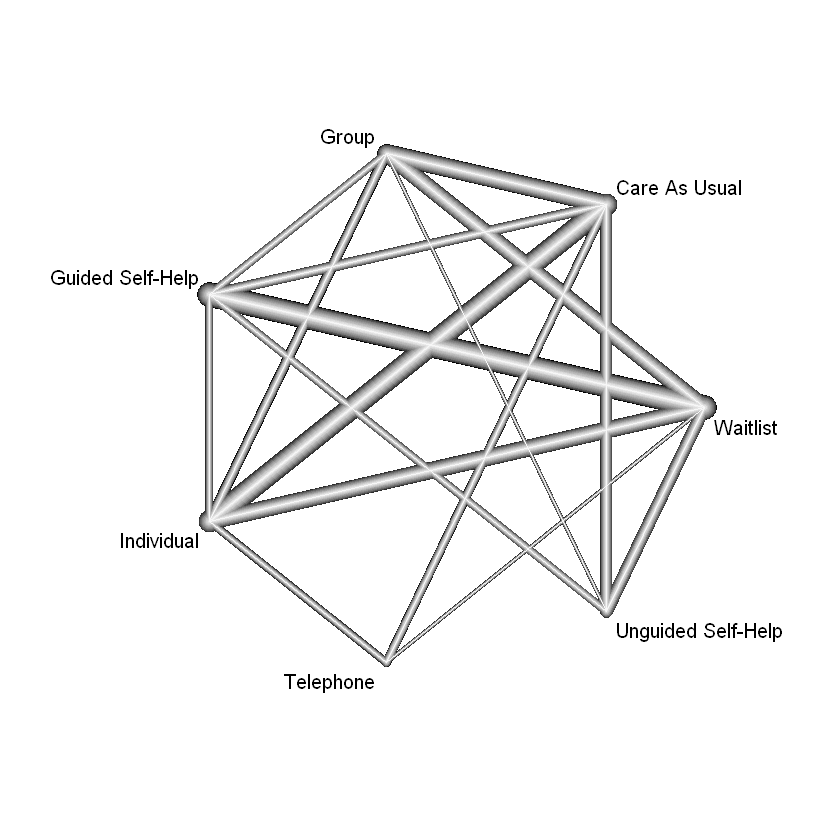

In [18]:
#* plot netgraph
netgraph(m.netmeta, labels = long.labels)

### 3D Graph

In [34]:
#* plot 3d graph
#* It's possible some errors to renderer the 3D plot inside jupyter
netgraph(
    m.netmeta,
    labels = long.labels,
    dim = "3d"
)

Direct Evidence Proportion for each Network Estimate 
 ------------------------------------------------- 
           Direct Indirect meanpath   minpar
gsh vs wlc 0.7330   0.2670 1.375686 1.368460
cau vs ind 0.7082   0.2918 1.509729 1.412002
cau vs grp 0.5838   0.4162 1.686599 1.713025
grp vs wlc 0.5768   0.4232 1.664465 1.733606
ind vs wlc 0.5094   0.4906 1.905819 1.975757
ind vs tel 0.4999   0.5001 1.543252 2.000347
ush vs wlc 0.3818   0.6182 1.883712 2.619146
cau vs ush 0.3529   0.6471 2.111886 2.833635
cau vs tel 0.3516   0.6484 1.932072 2.267229
gsh vs ush 0.2925   0.7075 1.984531 2.135013
tel vs wlc 0.2620   0.7380 2.238086 2.291156
grp vs gsh 0.2374   0.7626 1.975547 1.841692
cau vs gsh 0.2224   0.7776 2.317441 1.957564
grp vs ush 0.1652   0.8348 1.970634 2.664592
grp vs ind 0.0918   0.9082 2.078420 2.073314
gsh vs ind 0.0347   0.9653 2.392120 1.733851
cau vs wlc 0.0000   1.0000 2.106248 2.758412
grp vs tel 0.0000   1.0000 2.496669 2.265393
gsh vs tel 0.0000   1.0000 2.756563 1.6

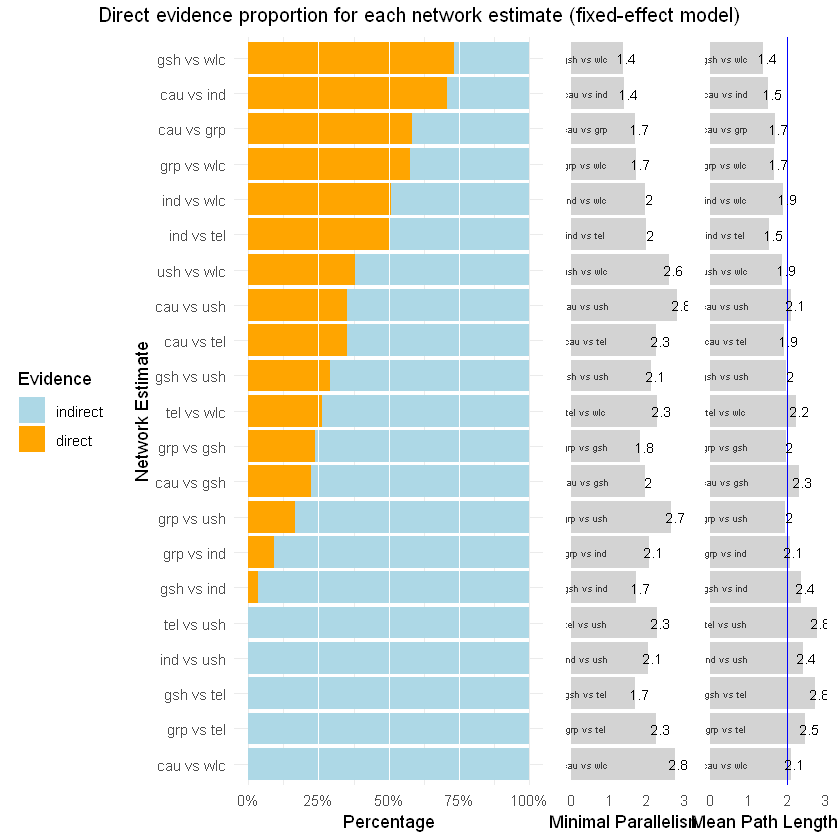

In [35]:
direct.evidence.plot(m.netmeta)

In [36]:
result.matrix <- m.netmeta$TE.fixed
result.matrix <- round(result.matrix, 2)
result.matrix[lower.tri(result.matrix, diag = FALSE)] <- NA
result.matrix

,cau,grp,gsh,ind,tel,ush,wlc
cau,0,0.58,0.39,0.64,0.51,0.13,-0.26
grp,NA,0.00,-0.18,0.06,-0.06,-0.45,-0.84
gsh,NA,NA,0.00,0.25,0.12,-0.26,-0.65
ind,NA,NA,NA,0.00,-0.13,-0.51,-0.90
tel,NA,NA,NA,NA,0.00,-0.38,-0.77
ush,NA,NA,NA,NA,NA,0.00,-0.39
wlc,NA,NA,NA,NA,NA,NA,0.00


In [37]:
netleague(
    m.netmeta,
    bracket = "(",
    digits=2
)

League table (common effects model):
                                                               
                  cau  0.37 ( 0.30;  0.44)  0.57 ( 0.43;  0.71)
  0.58 ( 0.52;  0.63)                  grp -0.23 (-0.36; -0.11)
  0.39 ( 0.33;  0.46) -0.18 (-0.24; -0.12)                  gsh
  0.64 ( 0.59;  0.69)  0.06 ( 0.00;  0.13)  0.25 ( 0.18;  0.31)
  0.51 ( 0.42;  0.61) -0.06 (-0.17;  0.04)  0.12 ( 0.01;  0.22)
  0.13 ( 0.04;  0.21) -0.45 (-0.53; -0.36) -0.26 (-0.35; -0.18)
 -0.26 (-0.32; -0.20) -0.84 (-0.89; -0.78) -0.65 (-0.70; -0.60)
                                                               
  0.70 ( 0.65;  0.76)  0.75 ( 0.59;  0.91)  0.19 ( 0.05;  0.34)
  0.10 (-0.10;  0.30)                    . -0.67 (-0.89; -0.46)
  0.11 (-0.26;  0.47)                    . -0.40 (-0.56; -0.24)
                  ind -0.19 (-0.32; -0.05)                    .
 -0.13 (-0.22; -0.03)                  tel                    .
 -0.51 (-0.60; -0.42) -0.38 (-0.51; -0.26)                  ush
 -0

### Save the league$fixed in a csv file

In [38]:
#* save netleague in a csv file
# write.csv(netleague$fixed, "netleague.csv")

### Effect size rank

In [39]:
netrank(m.netmeta, small.values = "good")

    P-score
ind  0.9958
grp  0.8184
tel  0.6837
gsh  0.5022
ush  0.3331
cau  0.1669
wlc  0.0000

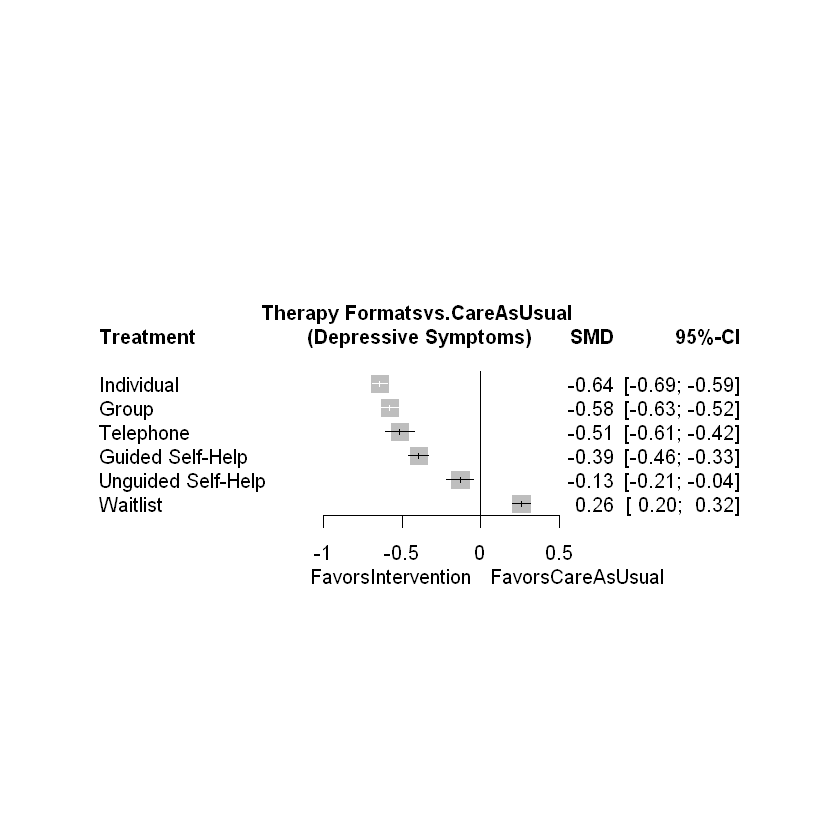

In [40]:
forest(
    m.netmeta,
    reference.group ="cau",
    sortvar = TE,
    xlim =c(-1.3, 0.5),
    smlab =paste("Therapy Formatsvs.CareAsUsual\n",
    "(Depressive Symptoms)"),
    drop.reference.group = TRUE,
    label.left ="FavorsIntervention",
    label.right ="FavorsCareAsUsual",
    labels = long.labels
)

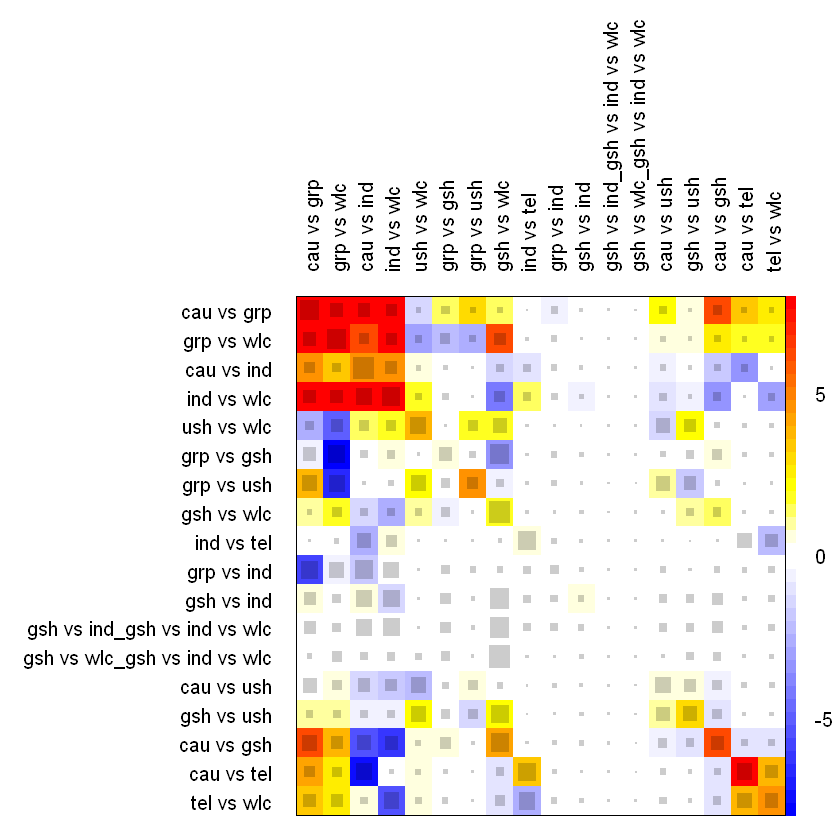

In [41]:
netheat(m.netmeta)

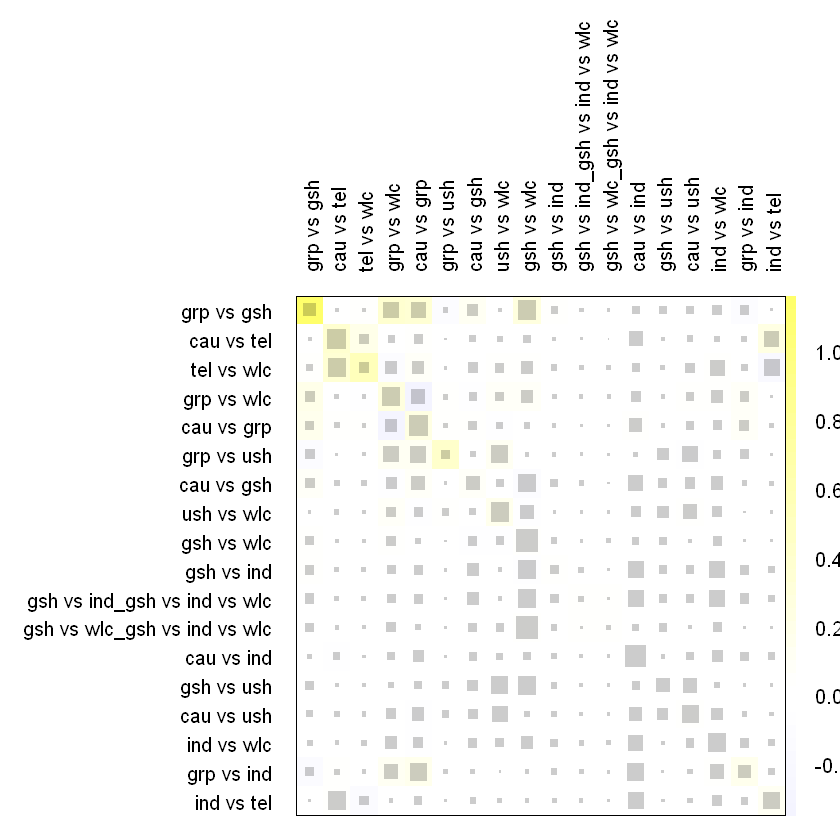

In [42]:
#* random plot
netheat(m.netmeta, random = TRUE)

In [55]:
#* fixed
netsplit(m.netmeta)

Separate indirect from direct evidence (SIDE) using back-calculation method

Common effects model: 

 comparison  k prop     nma  direct  indir.    Diff     z  p-value
 grp vs cau 21 0.58 -0.5767 -0.3727 -0.8628  0.4901  8.72 < 0.0001
 gsh vs cau  8 0.22 -0.3940 -0.5684 -0.3442 -0.2243 -2.82   0.0048
 ind vs cau 30 0.71 -0.6403 -0.7037 -0.4863 -0.2174 -3.97 < 0.0001
 tel vs cau  6 0.35 -0.5134 -0.7471 -0.3867 -0.3604 -3.57   0.0004
 ush vs cau  9 0.35 -0.1294 -0.1919 -0.0953 -0.0966 -1.06   0.2903
 wlc vs cau  0    0  0.2584       .  0.2584       .     .        .
 grp vs gsh  5 0.24 -0.1827 -0.2332 -0.1670 -0.0663 -0.91   0.3629
 grp vs ind  7 0.09  0.0636  0.1004  0.0598  0.0406  0.37   0.7099
 grp vs tel  0    0 -0.0633       . -0.0633       .     .        .
 grp vs ush  1 0.17 -0.4473 -0.6750 -0.4023 -0.2727 -2.31   0.0210
 grp vs wlc 18 0.58 -0.8351 -0.9817 -0.6352 -0.3465 -6.62 < 0.0001
 gsh vs ind  4 0.03  0.2462  0.1080  0.2512 -0.1432 -0.76   0.4496
 gsh vs tel  0    0  0.1194 

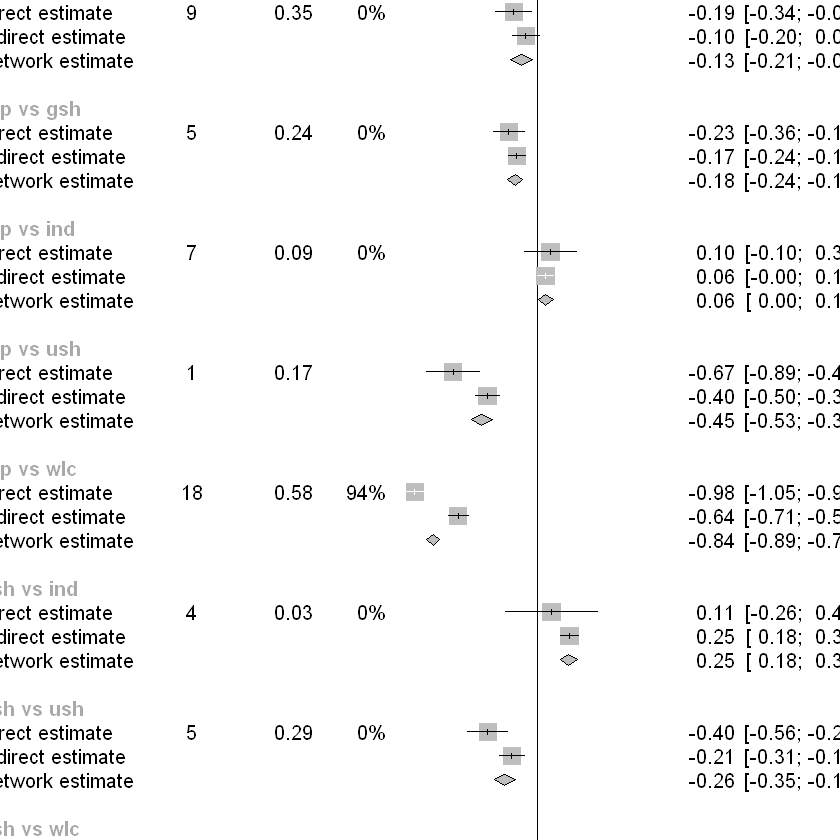

In [56]:
netsplit(m.netmeta) %>% forest()

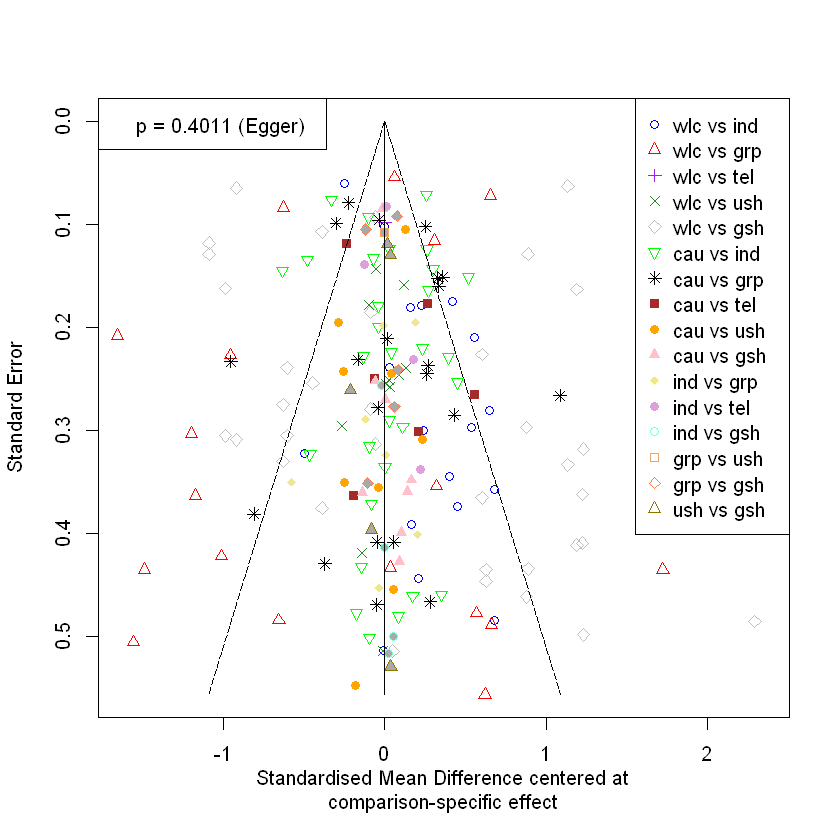

In [57]:
funnel(
    m.netmeta,
    order =c("wlc", "cau", "ind", "grp", "tel", "ush", "gsh"), # from old to new - verify the hypothesis that new studies was favored
    pch =c(1:4, 5, 6, 8, 15:19, 21:24),
    col =c("blue", "red", "purple", "forestgreen", "grey", "green", "black", "brown", "orange", "pink", "khaki", "plum", "aquamarine", "sandybrown", "coral", "gold4"),
    linreg = TRUE # Egger's test - p-value
)

## combo.random -> True

In [43]:
#* Apply meta function
m.netmetarandom <- netmeta(
    TE = TE,
    seTE = seTE,
    treat1 = treat1,
    treat2 = treat2,
    studlab = author,
    data = TherapyFormats,
    sm = "SMD",
    comb.fixed = FALSE,
    comb.random = TRUE,
    reference.group = "cau",
    details.chkmultiarm = TRUE,
    sep.trts = " vs "
)

In [44]:
m.netmetarandom

Number of studies: k = 182
Number of pairwise comparisons: m = 184
Number of treatments: n = 7
Number of designs: d = 17

Random effects model

Treatment estimate (sm = 'SMD', comparison: other treatments vs 'cau'):
        SMD             95%-CI     z  p-value
cau       .                  .     .        .
grp -0.4790 [-0.6664; -0.2917] -5.01 < 0.0001
gsh -0.5266 [-0.7420; -0.3111] -4.79 < 0.0001
ind -0.7193 [-0.8868; -0.5519] -8.42 < 0.0001
tel -0.6897 [-1.0310; -0.3483] -3.96 < 0.0001
ush -0.1702 [-0.4278;  0.0873] -1.30   0.1952
wlc  0.2677 [ 0.0697;  0.4658]  2.65   0.0081

Quantifying heterogeneity / inconsistency:
tau^2 = 0.2682; tau = 0.5179; I^2 = 89.6% [88.3%; 90.7%]

Tests of heterogeneity (within designs) and inconsistency (between designs):
                      Q d.f.  p-value
Total           1696.94  177 < 0.0001
Within designs  1595.04  165 < 0.0001
Between designs  101.90   12 < 0.0001

In [45]:
decomp.design(m.netmetarandom)

Q statistics to assess homogeneity / consistency

                      Q  df  p-value
Total           1696.94 177 < 0.0001
Within designs  1595.04 165 < 0.0001
Between designs  101.90  12 < 0.0001

Design-specific decomposition of within-designs Q statistic

     Design       Q df  p-value
 gsh vs wlc 1026.72 34 < 0.0001
 grp vs wlc  303.80 17 < 0.0001
 cau vs ind  100.00 29 < 0.0001
 cau vs grp   82.50 20 < 0.0001
 ind vs wlc   52.66 16 < 0.0001
 cau vs tel   11.40  5   0.0440
 ind vs tel    1.86  3   0.6026
 cau vs ush    5.94  8   0.6539
 grp vs ind    4.10  6   0.6636
 grp vs gsh    2.17  4   0.7037
 gsh vs ush    0.79  4   0.9395
 gsh vs ind    0.02  2   0.9909
 ush vs wlc    2.37 10   0.9927
 cau vs gsh    0.72  7   0.9982

Between-designs Q statistic after detaching of single designs
(influential designs have p-value markedly different from < 0.0001)

   Detached design      Q df  p-value
        cau vs grp  25.92 11   0.0067
        grp vs wlc  58.10 11 < 0.0001
        ind vs

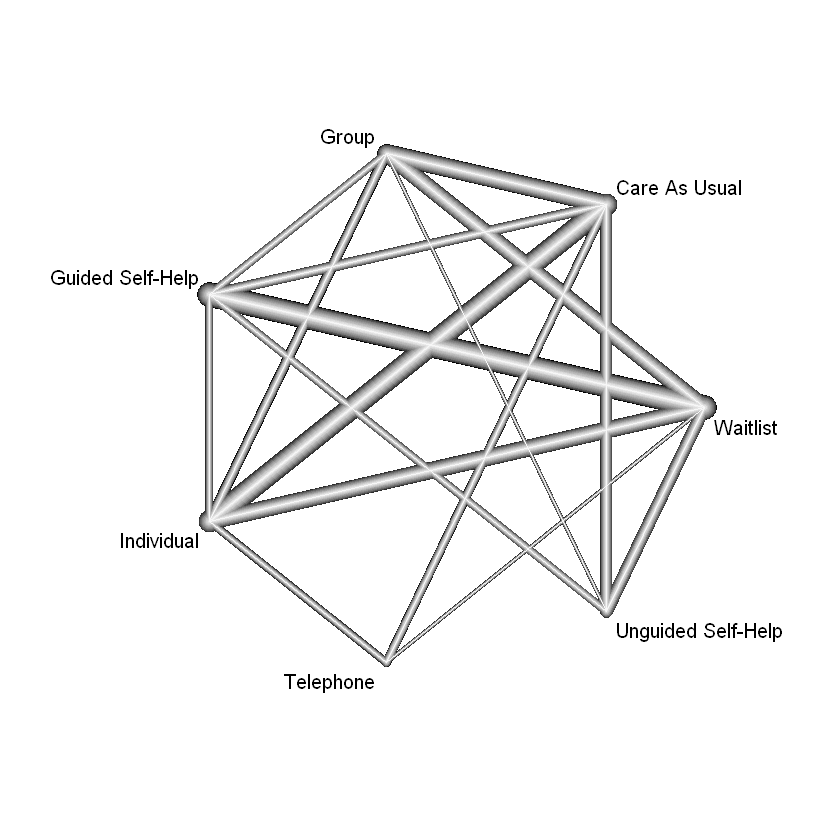

In [46]:
#* plot netgraph
netgraph(m.netmetarandom, labels = long.labels)

Direct Evidence Proportion for each Network Estimate 
 ------------------------------------------------- 
           Direct Indirect meanpath   minpar
gsh vs wlc 0.7330   0.2670 1.375686 1.368460
cau vs ind 0.7082   0.2918 1.509729 1.412002
cau vs grp 0.5838   0.4162 1.686599 1.713025
grp vs wlc 0.5768   0.4232 1.664465 1.733606
ind vs wlc 0.5094   0.4906 1.905819 1.975757
ind vs tel 0.4999   0.5001 1.543252 2.000347
ush vs wlc 0.3818   0.6182 1.883712 2.619146
cau vs ush 0.3529   0.6471 2.111886 2.833635
cau vs tel 0.3516   0.6484 1.932072 2.267229
gsh vs ush 0.2925   0.7075 1.984531 2.135013
tel vs wlc 0.2620   0.7380 2.238086 2.291156
grp vs gsh 0.2374   0.7626 1.975547 1.841692
cau vs gsh 0.2224   0.7776 2.317441 1.957564
grp vs ush 0.1652   0.8348 1.970634 2.664592
grp vs ind 0.0918   0.9082 2.078420 2.073314
gsh vs ind 0.0347   0.9653 2.392120 1.733851
cau vs wlc 0.0000   1.0000 2.106248 2.758412
grp vs tel 0.0000   1.0000 2.496669 2.265393
gsh vs tel 0.0000   1.0000 2.756563 1.6

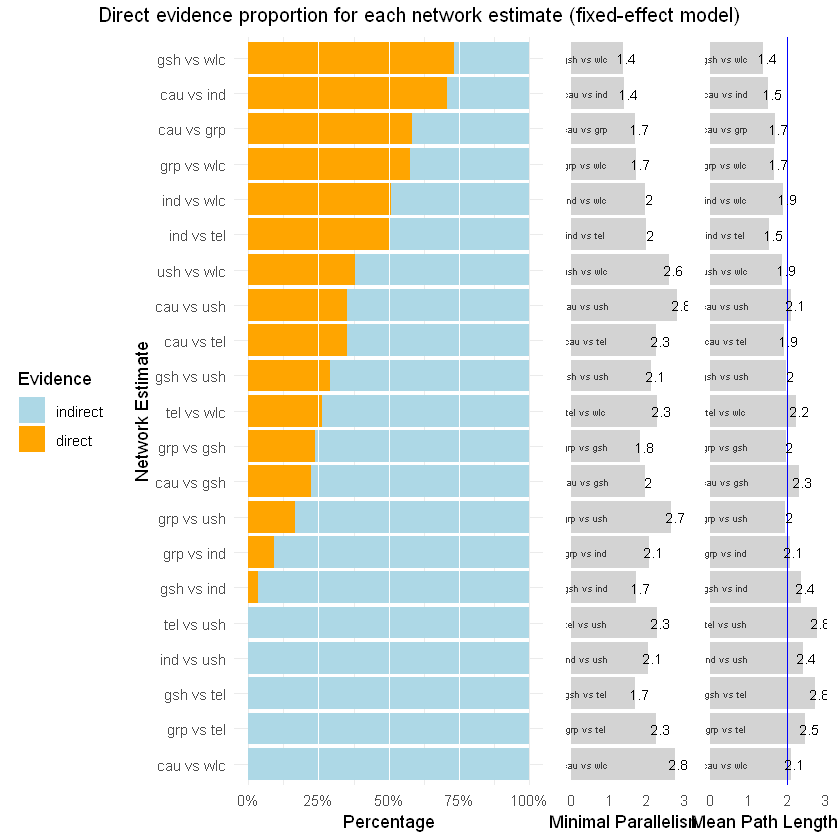

In [47]:
direct.evidence.plot(m.netmetarandom)

In [48]:
result.matrixrandom <- m.netmetarandom$TE.random
result.matrixrandom <- round(result.matrixrandom, 2)
result.matrixrandom[lower.tri(result.matrixrandom, diag = FALSE)] <- NA
result.matrixrandom

,cau,grp,gsh,ind,tel,ush,wlc
cau,0,0.48,0.53,0.72,0.69,0.17,-0.27
grp,NA,0.00,0.05,0.24,0.21,-0.31,-0.75
gsh,NA,NA,0.00,0.19,0.16,-0.36,-0.79
ind,NA,NA,NA,0.00,-0.03,-0.55,-0.99
tel,NA,NA,NA,NA,0.00,-0.52,-0.96
ush,NA,NA,NA,NA,NA,0.00,-0.44
wlc,NA,NA,NA,NA,NA,NA,0.00


In [49]:
netleague(
    m.netmetarandom,
    bracket = "(",
    digits=2
)

League table (random effects model):
                                                               
                  cau  0.42 ( 0.17;  0.66)  0.60 ( 0.18;  1.02)
  0.48 ( 0.29;  0.67)                  grp -0.23 (-0.73;  0.26)
  0.53 ( 0.31;  0.74)  0.05 (-0.17;  0.27)                  gsh
  0.72 ( 0.55;  0.89)  0.24 ( 0.03;  0.45)  0.19 (-0.03;  0.41)
  0.69 ( 0.35;  1.03)  0.21 (-0.16;  0.59)  0.16 (-0.22;  0.55)
  0.17 (-0.09;  0.43) -0.31 (-0.58; -0.03) -0.36 (-0.62; -0.09)
 -0.27 (-0.47; -0.07) -0.75 (-0.94; -0.55) -0.79 (-0.96; -0.63)
                                                               
  0.73 ( 0.52;  0.93)  0.84 ( 0.38;  1.30)  0.13 (-0.26;  0.53)
  0.14 (-0.31;  0.59)                    . -0.67 (-1.71;  0.36)
  0.10 (-0.55;  0.75)                    . -0.36 (-0.88;  0.16)
                  ind -0.13 (-0.68;  0.42)                    .
 -0.03 (-0.38;  0.32)                  tel                    .
 -0.55 (-0.82; -0.27) -0.52 (-0.93; -0.11)                  ush
 -0

In [50]:
#* save netleague in a csv file
# write.csv(netleague$random, "netleague.csv")

In [51]:
netrank(m.netmetarandom, small.values = "good")

    P-score
ind  0.9184
tel  0.8481
gsh  0.6511
grp  0.5782
ush  0.3212
cau  0.1823
wlc  0.0007

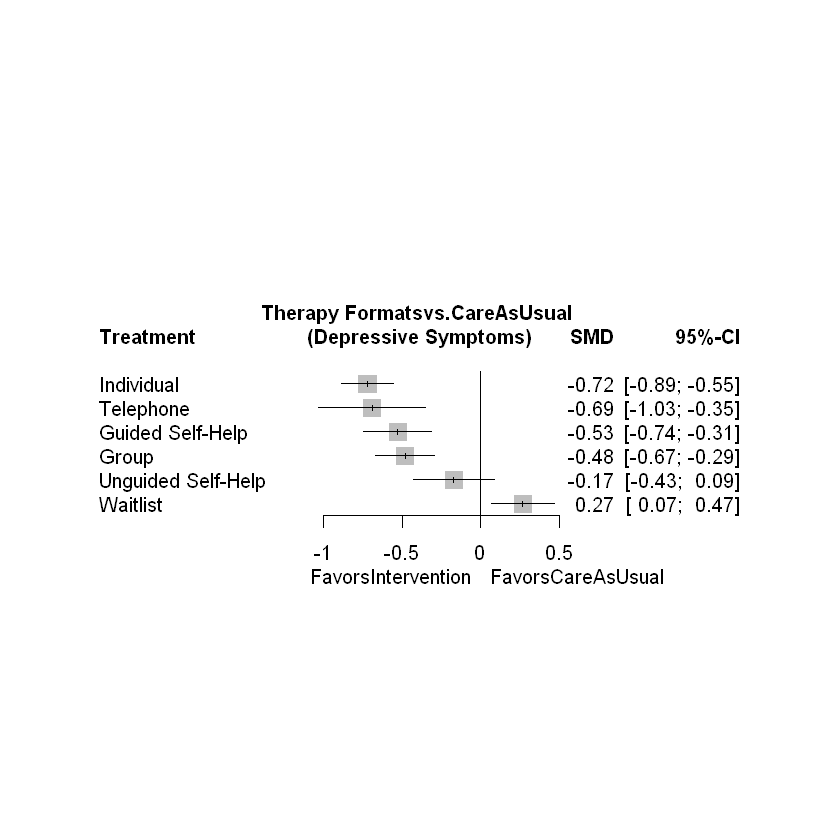

In [52]:
forest(
    m.netmetarandom,
    reference.group ="cau",
    sortvar = TE,
    xlim =c(-1.3, 0.5),
    smlab =paste("Therapy Formatsvs.CareAsUsual\n",
    "(Depressive Symptoms)"),
    drop.reference.group = TRUE,
    label.left ="FavorsIntervention",
    label.right ="FavorsCareAsUsual",
    labels = long.labels
)

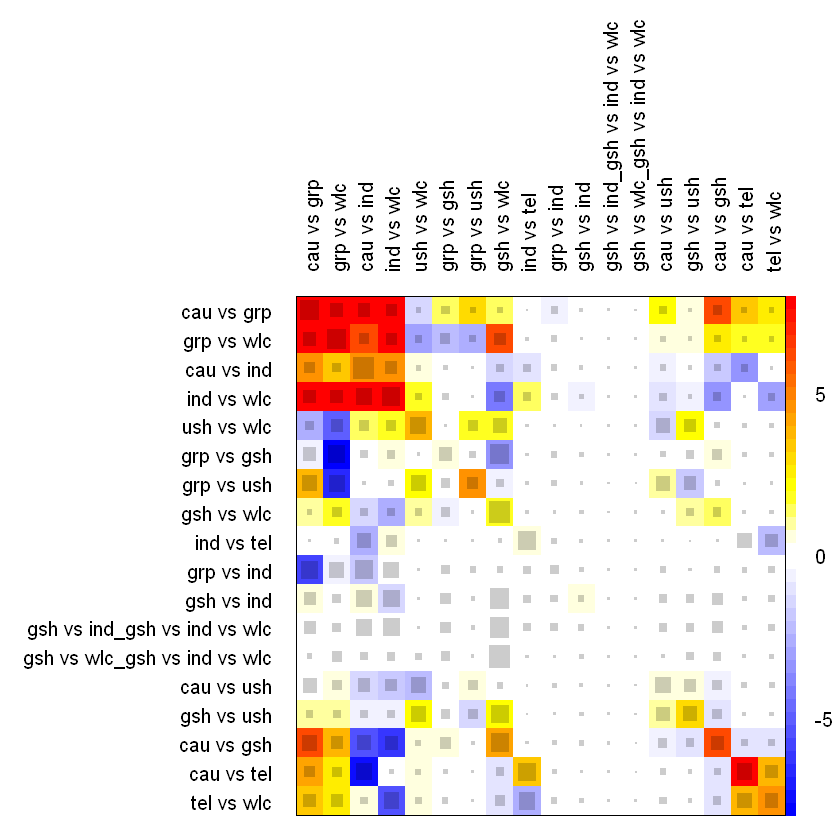

In [53]:
netheat(m.netmetarandom)

In [54]:
#* random
netsplit(m.netmetarandom)

Separate indirect from direct evidence (SIDE) using back-calculation method

Random effects model: 

 comparison  k prop     nma  direct  indir.    Diff     z p-value
 grp vs cau 21 0.57 -0.4790 -0.4155 -0.5629  0.1474  0.76  0.4452
 gsh vs cau  8 0.26 -0.5266 -0.5998 -0.5005 -0.0993 -0.40  0.6911
 ind vs cau 30 0.65 -0.7193 -0.7256 -0.7076 -0.0179 -0.10  0.9203
 tel vs cau  6 0.55 -0.6897 -0.8387 -0.5072 -0.3315 -0.95  0.3438
 ush vs cau  9 0.43 -0.1702 -0.1338 -0.1972  0.0635  0.24  0.8113
 wlc vs cau  0    0  0.2677       .  0.2677       .     .       .
 grp vs gsh  5 0.20  0.0475 -0.2314  0.1170 -0.3484 -1.24  0.2166
 grp vs ind  7 0.21  0.2403  0.1406  0.2675 -0.1269 -0.49  0.6236
 grp vs tel  0    0  0.2106       .  0.2106       .     .       .
 grp vs ush  1 0.07 -0.3088 -0.6750 -0.2809 -0.3941 -0.72  0.4727
 grp vs wlc 18 0.47 -0.7467 -0.6696 -0.8145  0.1449  0.73  0.4680
 gsh vs ind  4 0.12  0.1928  0.0982  0.2052 -0.1070 -0.30  0.7618
 gsh vs tel  0    0  0.1631       .  0.16